In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Lab_EDA_Gestion_Nulos\\datos\\df_final.csv', index_col=0)
df.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,abtest_control,abtest_test
0,5864.791484,480,5219.889308,4593.730994,4737.952367,0.075206,0.0,2505.270905,4985.686604,5358.364787,3263.878161,6873.875154,5919.184856,5862.136698,0.0,1.0
1,5864.791484,18300,11252.430270,12166.479530,4737.952367,1.063492,-1.0,6122.293626,8621.426035,9007.739139,2273.463724,6873.875154,5919.184856,5862.136698,0.0,1.0
2,5864.791484,9800,13332.624775,4593.730994,10663.846715,0.650794,-1.0,6092.941274,8621.426035,11071.351592,3263.878161,6873.875154,5919.184856,5862.136698,0.0,1.0
3,5864.791484,1500,2828.211457,4593.730994,4737.952367,-0.730159,0.0,6281.659842,4985.686604,5358.364787,7063.780127,4617.801420,5919.184856,5862.136698,0.0,1.0
4,5864.791484,3600,2828.211457,4593.730994,4737.952367,-0.825397,-2.4,6721.586025,8621.426035,6508.064481,7063.780127,6873.875154,5919.184856,5862.136698,0.0,1.0


<Axes: xlabel='powerCV_robust', ylabel='price'>

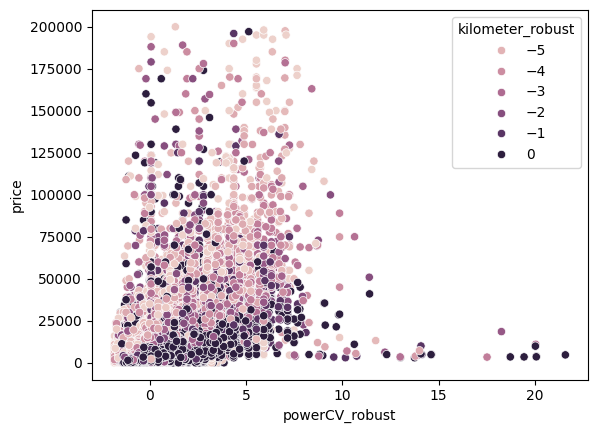

In [21]:
sns.scatterplot(y = 'price', x = 'powerCV_robust', hue='kilometer_robust' ,data = df)

In [22]:
df[(df['powerCV_robust'] > 15) & (df['price'] < 30000)]

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,abtest_control,abtest_test
19912,5864.791484,3390,5219.889308,4593.730994,4737.952367,17.507937,-3.6,6137.123458,4985.686604,4707.428956,7063.780127,4617.801420,5919.184856,5862.136698,0.0,1.0
78553,5864.791484,4700,5879.353589,4593.730994,10663.846715,21.571429,0.0,5891.428391,8621.426035,8378.292269,7063.780127,6873.875154,5919.184856,5862.136698,0.0,1.0
84762,5864.791484,18550,5219.889308,12166.479530,4737.952367,18.253968,-2.4,6358.329089,8621.426035,8465.889073,7063.780127,6873.875154,5919.184856,5862.136698,0.0,1.0
113424,5864.791484,3799,5879.353589,4593.730994,4737.952367,20.063492,0.0,6366.972981,8621.426035,5358.364787,7063.780127,4617.801420,5919.184856,5862.136698,0.0,1.0
140982,5864.791484,3550,5879.353589,4593.730994,4737.952367,20.063492,0.0,6181.023898,8621.426035,5358.364787,2273.463724,4617.801420,5919.184856,5862.136698,0.0,1.0
193086,5864.791484,3500,5879.353589,4593.730994,4737.952367,18.714286,0.0,6137.123458,8621.426035,5358.364787,7063.780127,4617.801420,5919.184856,5862.136698,0.0,1.0
222201,5864.791484,11000,5879.353589,4593.730994,4737.952367,20.031746,-3.2,6358.329089,4985.686604,2977.821109,3263.878161,6873.875154,5919.184856,5862.136698,0.0,1.0
274838,5864.791484,3500,10552.954201,4593.730994,4737.952367,19.428571,0.0,6376.656650,8621.426035,3263.601895,3263.878161,4617.801420,5919.184856,5862.136698,0.0,1.0
312526,5864.791484,9900,6779.067760,12166.479530,4737.952367,20.015873,0.0,6378.947098,3214.502829,5358.364787,7063.780127,6873.875154,5919.184856,5862.136698,0.0,1.0


In [23]:
# Calculamos la media de la columna 'powerCV'
media_powerCV = df['powerCV_robust'].mean()

# Modificamos los valores de 'powerCV' en las filas seleccionadas
df.loc[(df['powerCV_robust'] > 15) & (df['price'] < 30000), 'powerCV_robust'] = media_powerCV


In [24]:
df[(df['powerCV_robust'] > 15) & (df['price'] < 30000)]

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,abtest_control,abtest_test


Sustituir su power por la media, porque estos coches no es posible que tenga un caballaje de ese valor

Otra prueba

In [25]:
df.loc[(df['powerCV_robust'] > 7) & (df['powerCV_robust'] < 15) & (df['price'] < 12500), 'powerCV_robust'] = media_powerCV

ponerles la media de power_CV

In [30]:
df.loc[(df['kilometer_robust'] > -1) & (df['price'] > 150000) & (df['powerCV_robust'] < 2.7)] = media_powerCV

<Axes: xlabel='powerCV_robust', ylabel='price'>

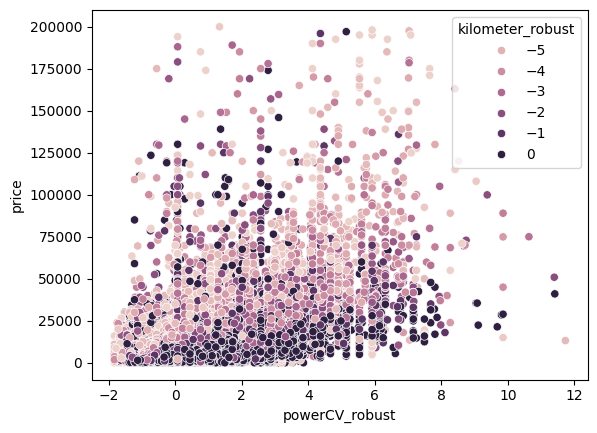

In [31]:
sns.scatterplot(y = 'price', x = 'powerCV_robust', hue='kilometer_robust' ,data = df)

In [29]:
df[(df['price'] > 150000) & (df['powerCV_robust'] < 2.7)]

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,abtest_control,abtest_test
4176,5864.791484,185000,10552.954201,12927.039746,10663.846715,0.761905,-5.8,6721.586025,4985.686604,8465.889073,7063.780127,6873.875154,5919.184856,5862.136698,0.0,1.0
14684,5864.791484,189000,10552.954201,4593.730994,4737.952367,1.714286,-2.8,6281.659842,4985.686604,39031.203088,7063.780127,6873.875154,5919.184856,5862.136698,0.0,1.0
35056,5864.791484,154651,5219.889308,4593.730994,3321.785813,0.075206,0.0,2505.270905,3214.502829,4505.680142,3263.878161,4617.801420,5919.184856,5862.136698,0.0,1.0
44606,5864.791484,199900,10552.954201,12927.039746,4737.952367,1.333333,-5.6,6376.656650,4985.686604,39031.203088,7063.780127,6873.875154,5919.184856,5862.136698,0.0,1.0
45233,5864.791484,169000,10552.954201,4593.730994,4737.952367,1.936508,-3.6,6281.659842,4985.686604,39031.203088,7063.780127,4617.801420,5919.184856,5862.136698,0.0,1.0
50032,5864.791484,179000,11252.430270,4593.730994,3321.785813,0.075206,-2.0,6721.586025,4985.686604,8465.889073,7063.780127,4617.801420,5919.184856,5862.136698,1.0,0.0
51838,6200.753949,169000,11252.430270,12927.039746,4737.952367,-0.190476,-2.4,6122.293626,4985.686604,39031.203088,7063.780127,6873.875154,5919.184856,6197.278326,1.0,0.0
61739,6200.753949,175000,10552.954201,12927.039746,4737.952367,-0.555556,-5.2,6378.947098,4985.686604,13451.140496,7063.780127,6873.875154,5919.184856,6197.278326,0.0,1.0
87436,5864.791484,174000,5219.889308,7619.512858,4737.952367,0.920635,-5.8,2505.270905,3214.502829,39031.203088,3263.878161,6873.875154,5919.184856,5862.136698,1.0,0.0
97748,5864.791484,160000,5219.889308,4593.730994,4737.952367,-0.190476,0.0,6191.361448,4985.686604,5351.607775,7063.780127,4617.801420,5919.184856,5862.136698,0.0,1.0


# Pruebas

In [28]:
df.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,abtest_control,abtest_test
0,5864.791484,480,5219.889308,4593.730994,4737.952367,0.075206,0.0,2505.270905,4985.686604,5358.364787,3263.878161,6873.875154,5919.184856,5862.136698,0.0,1.0
1,5864.791484,18300,11252.430270,12166.479530,4737.952367,1.063492,-1.0,6122.293626,8621.426035,9007.739139,2273.463724,6873.875154,5919.184856,5862.136698,0.0,1.0
2,5864.791484,9800,13332.624775,4593.730994,10663.846715,0.650794,-1.0,6092.941274,8621.426035,11071.351592,3263.878161,6873.875154,5919.184856,5862.136698,0.0,1.0
3,5864.791484,1500,2828.211457,4593.730994,4737.952367,-0.730159,0.0,6281.659842,4985.686604,5358.364787,7063.780127,4617.801420,5919.184856,5862.136698,0.0,1.0
4,5864.791484,3600,2828.211457,4593.730994,4737.952367,-0.825397,-2.4,6721.586025,8621.426035,6508.064481,7063.780127,6873.875154,5919.184856,5862.136698,0.0,1.0


In [32]:
df.to_csv('C:\\Users\\DELL\\Git\\Lab_EDA_Gestion_Nulos\\datos\\df_final_prueba.csv')